In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sys
import scipy.stats as stats
%load_ext autoreload
%autoreload 2
sys.path.append('../Utils')
from eda import AnaliseEDA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
eda = AnaliseEDA()

In [3]:
df = pd.read_csv("../Dados/Customer-Churn-Records.csv")#Lendo a base de dados
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()#Analisar se há valores faltantes e se os tipos das colunas estão certos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Não há valores faltantes, logo só nos resta vermos se há outliers. Então analisarei o describe das variaveis numericas e das variaveis categóricas.

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Após a análise percebesse que não há outliers, mas para eu ter certeza vou ter que analisar isso na analise univariada.

In [6]:
df.select_dtypes("object").describe()

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


Neste momento, não há muito a ser analisado, já que, como visto anteriormente, os dados não apresentam valores faltantes. Observa-se que a maioria dos clientes são homens, utilizam o cartão do tipo 'Diamond' e são provenientes da França. No entanto, essas informações, isoladamente, ainda não oferecem grandes insights — uma análise univariada será mais adequada para compreender melhor essas variáveis.

Antes de iniciar a análise univariada, serão removidas algumas colunas que não agregam valor à modelagem, como CustomerId, RowNumber e Surname.

In [7]:
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)

### Análise Univariada
Variaveis Númericas

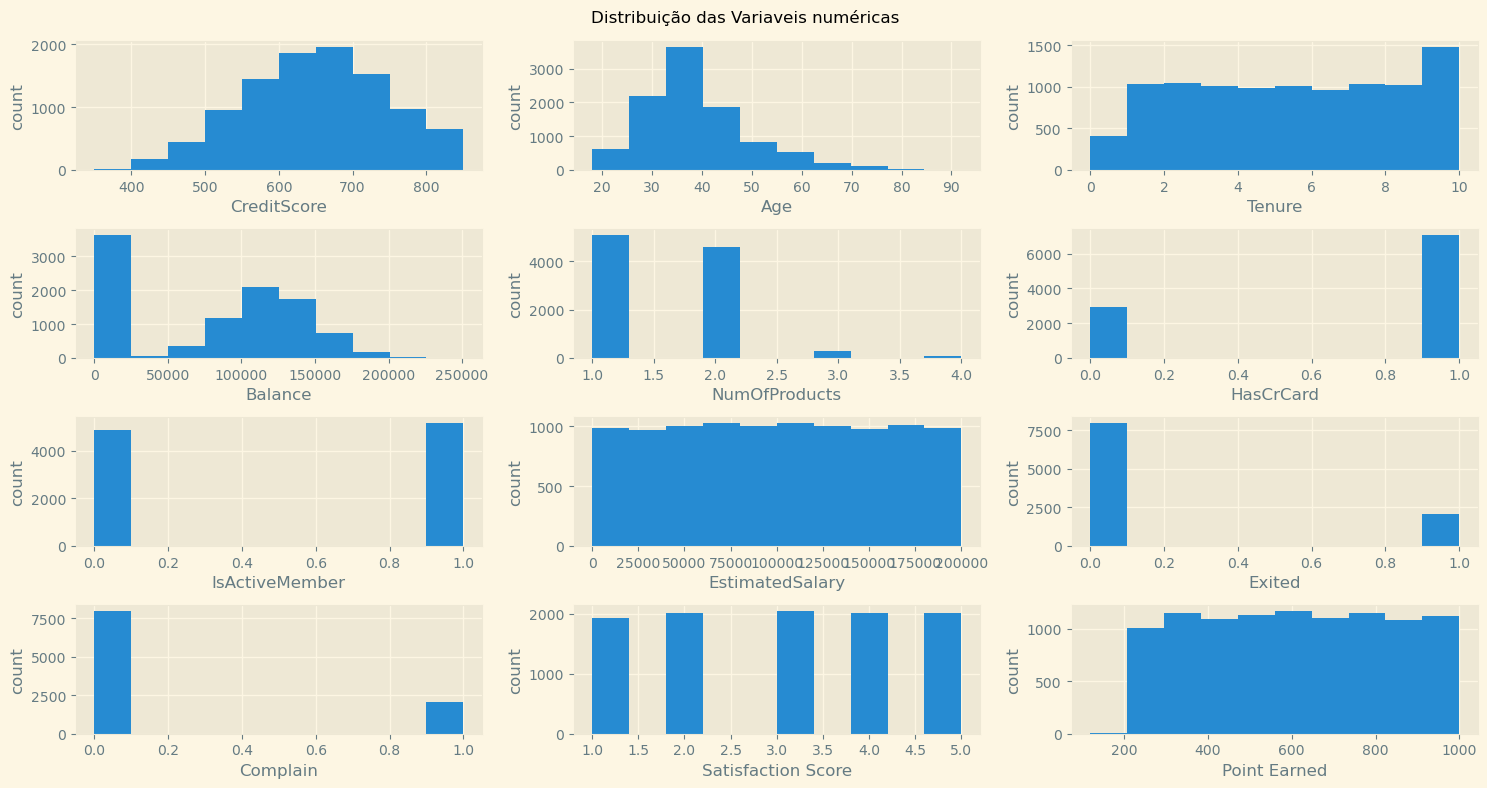

In [8]:
eda.analiseUnivariada(df, "number")

A partir das análises realizadas, foi possível identificar a presença de outliers na variável Age. No entanto, antes de optar por sua remoção, será necessário verificar se esses valores extremos possuem relação significativa com a variável alvo Exited. Caso essa associação se confirme, o tratamento será conduzido com cautela, a fim de preservar informações relevantes para o modelo. As demais variáveis não apresentaram outliers significativos.

Além disso, observou-se que as colunas Exited e Complain apresentam proporções semelhantes, o que pode indicar uma possível correlação entre elas. Esse aspecto será investigado com mais profundidade na análise bivariada. No geral, as demais variáveis, até o momento, não revelaram insights relevantes de forma isolada. Agora analisarei as variaveis categoricas

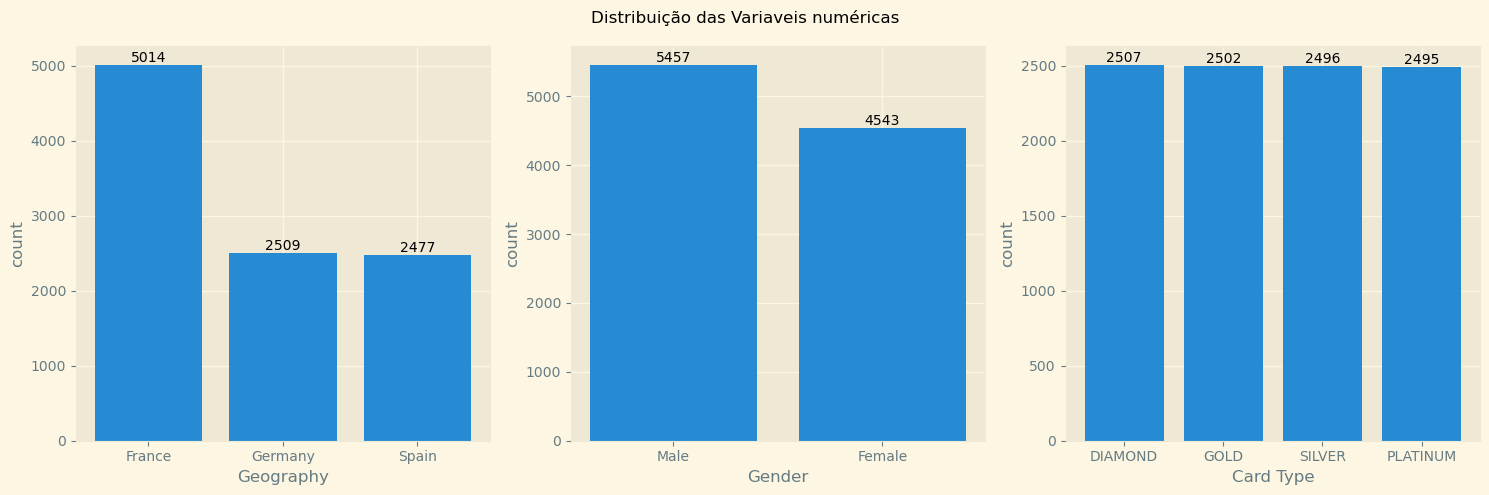

In [12]:
eda.analiseUnivariada(df, "object")

Após a análise das variáveis, observa-se que a maioria dos clientes é da França. Em relação ao gênero, há uma diferença moderada na distribuição entre homens e mulheres. Já a variável Car Type apresenta categorias com valores bem equilibrados, sem grandes discrepâncias.

---
### Conclusão da Análise Univariada
A análise univariada proporcionou uma visão inicial relevante sobre o comportamento das variáveis do conjunto de dados. Entre as variáveis numéricas, destacam-se outliers na variável Age, que requerem atenção especial, pois podem estar associados ao churn. Também foi possível observar que a maioria dos clientes possui cartão de crédito e mantém entre 1 a 2 produtos com o banco.

Em relação às variáveis categóricas, a maioria dos clientes é da França, há um leve desequilíbrio entre os gêneros, e os tipos de cartão estão distribuídos de forma relativamente uniforme. Além disso, a semelhança nas proporções das variáveis Exited e Complain pode indicar uma possível correlação, que será explorada na análise bivariada.

De modo geral, a análise univariada foi fundamental para compreender a estrutura dos dados, identificar padrões iniciais e orientar os próximos passos da análise exploratória. Agora irei partir para as análises bi variadas para agora identificar algum padrão entre as variavies e a target

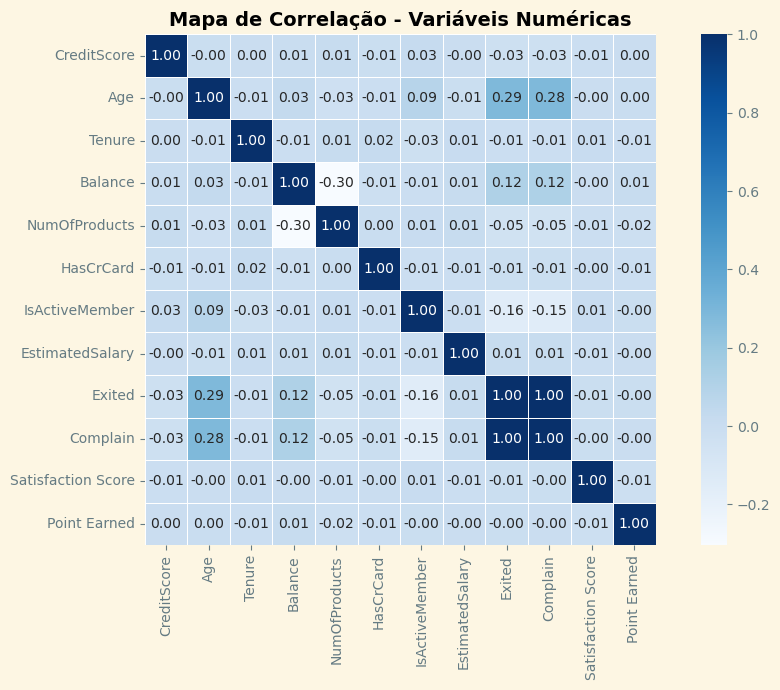

In [ ]:

corr = df.select_dtypes(include="number").corr()
# Criando o gráfico de correlação
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='Blues',           # Paleta azul
    linewidths=0.5,
    linecolor='white',
    square=True,
)

plt.title('Mapa de Correlação - Variáveis Numéricas', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Insights
As pessoas que já reclamaram com os serviços, tendem a ter uma grande probabilidade de cancelamento do cartão, o que nos leva investigar o que seriam os motivos para reclamações!
Vemos também que quanto mais velha a pessoa, maior as chances de haver uma uma reclamação e consequentemente a maior probabilidades de cancelamento do cartão. 
O que nos leva a pensar que as pessoas mais velhas, não estao tendo um tratamento adequado! 
Vamos continuar as analises e vermos mais detalhes! 

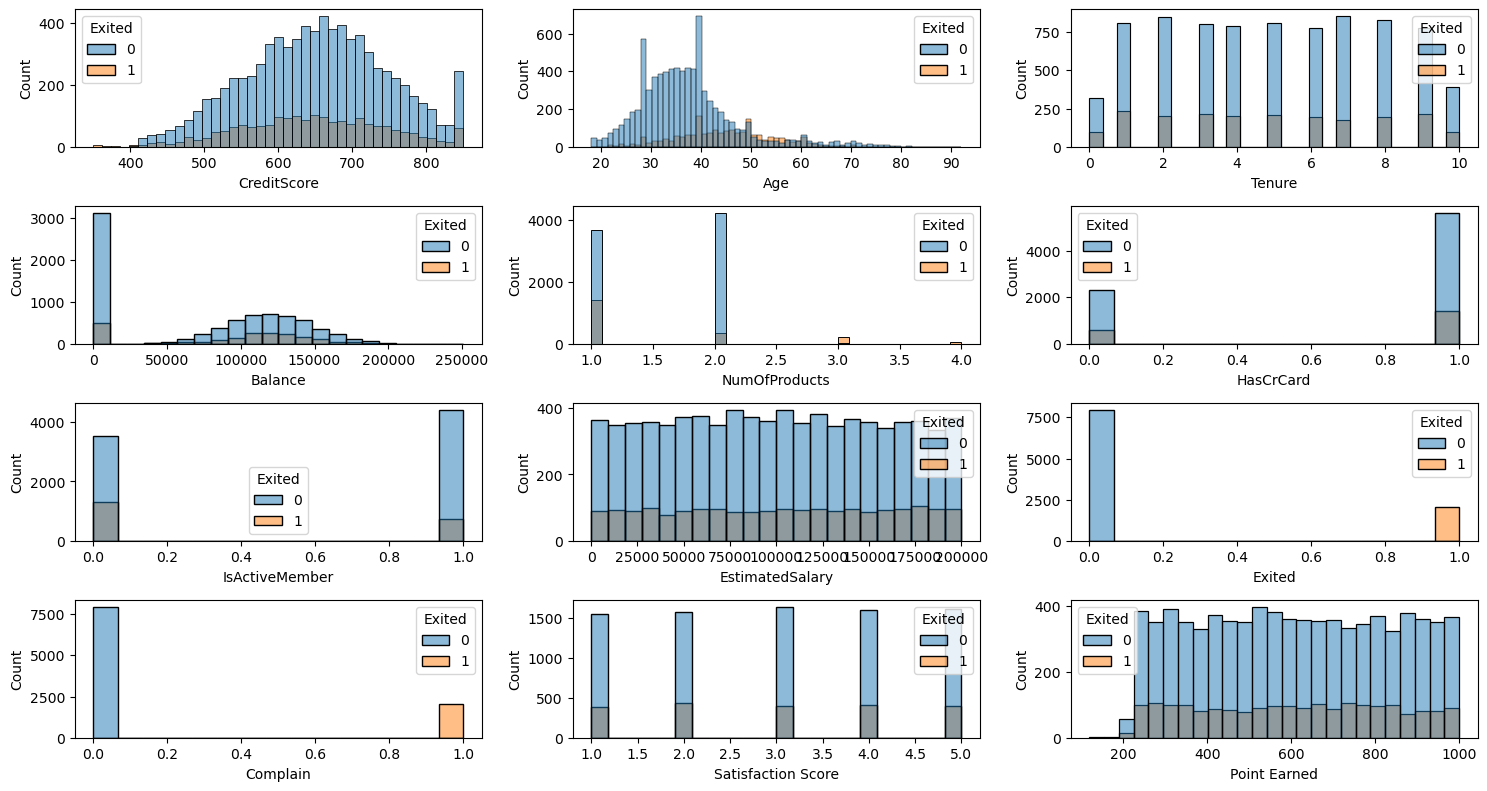

In [12]:
plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.histplot(df,x=coluna, hue="Exited")
plt.tight_layout()
plt.show()

Após a analise dos graficos, fica claro que as pessoas mais velhas tendem a cancelar mais os cartões e que as pessoas que são membros ativos tem uma menor probabilidade de cancelar! Agora vamos analisar um pouco as colunas categoricas e vermos se tiramos mais alguns insigts!

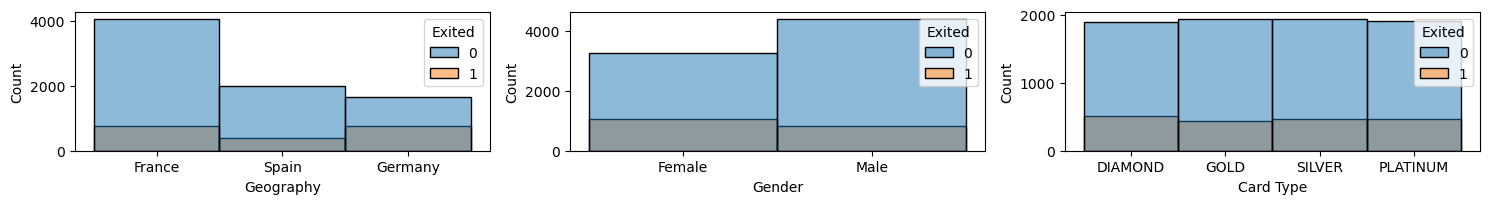

In [55]:

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(dfSemOutliears.select_dtypes("object").columns):
    plt.subplot(numeroCols, 3, i+1)
    sns.histplot(dfSemOutliears, x=coluna, hue="Exited")
plt.tight_layout()
plt.show()

Analisando os graficos, vemos que a metade dos clientes da alemanha cancelaram, o que nos indica que há uma probabilidade de lá os clientes serem insatisfeitos com os produtos. Para uma melhor analise, vamos ver se lá a média das idades são grandes, pq se forem, nós podemos concluir que pelo fato da idade influenciar na saida dos clientes e lá ter uma média de idades altas, é normal que lá a probabilidade de os clientes cancelarem o cartão é maior!

In [56]:
for i, coluna in enumerate(dfSemOutliears.select_dtypes("object").columns):
    print(dfSemOutliears[[coluna, "Age"]].groupby(coluna).mean())


                 Age
Geography           
France     37.284910
Germany    38.675980
Spain      37.697302
              Age
Gender           
Female  38.015697
Male    37.504202
                 Age
Card Type           
DIAMOND    37.851913
GOLD       37.508211
PLATINUM   37.774979
SILVER     37.805567


Vemos que a média é maior, mas pouca coisa, o que não é o sufuciente para determinarmos que o problema realmente é a idade nas bases categoricas. Depois de nossas analises, vamos transformar os nossos dados tratados em um arquivo csv para depois usarmos ele para os modelos de machine learning

In [57]:
dfSemOutliears.to_csv("../Dados/Base de dados Tratada.csv")

| **Insight**                                          | **Descrição**                                                                                     | **Recomendação**                                                                 |
|------------------------------------------------------|-------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **Pessoas mais velhas cancelam mais cartões**        | Clientes com idades mais avançadas tendem a cancelar mais cartões.                               | Ofereça benefícios personalizados para clientes mais velhos (ex.: suporte VIP). |
| **Número de produtos está inversamente relacionado ao churn** | Clientes com mais produtos contratados (empréstimos, seguros, etc.) tendem a cancelar menos.    | Promova a contratação de produtos adicionais para aumentar a retenção.          |
| **Membros ativos tendem a não cancelar**             | Clientes que são membros ativos possuem menor propensão a cancelar seus cartões.                 | Promova programas de engajamento para aumentar a atividade dos clientes.        |